In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysr import PySRRegressor
# For symbolic manipulation:
from sympy import symbols, sympify, lambdify, Symbol
import os
os.environ["JULIA_NUM_THREADS"] = "8"  # Use 8 threads (adjust as needed)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
# ## Step 2: Load the Data
#
# Load your CSV file. Make sure the file `real_estate_valuation_cleaned.csv` is in your working directory.
# We use "X2 distance MRT station" and "X3 number convenience stores" as predictors and "X6 price" as target.

# Load the dataset
data = pd.read_csv("C:/Users/svenl/vs_code_projects/hyperRealDataDescriber/data/real_estate/real_estate_valuation_cleaned.csv")

# Extract predictors and target
X = data[["X2 distance MRT station", "X3 number convenience stores"]].values
y = data["X6 price"].values

In [3]:
# ## Step 3: Run PySR with Denoising
#
# We enable the denoise option so that PySR preprocesses the data via a Gaussian process.
# This helps extract the underlying signal before applying symbolic regression.

# Configure and run the PySR model
model = PySRRegressor(
    niterations=1000,  # Increase for a more thorough search if desired
    denoise=True,      # Enable denoising
    progress=True      # Display progress during fitting
)
model.fit(X, y)

print("Discovered symbolic regression model:")
print(model)

c:\Users\svenl\miniconda3\envs\hyperRealDataDescriber\Lib\site-packages\pysr\sr.py:2766: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\svenl\miniconda3\envs\hyperRealDataDescriber\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 9.940e+04
Progress: 481 / 31000 total iterations (1.552%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.047e+01  1.594e+01  y = 37.972
3           1.104e+01  3.087e-01  y = x₁ + 33.877
5           7.455e+00  1.964e-01  y = (x₀ * -0.0028624) - -41.075
7           7.440e+00  1.013e-03  y = ((x₀ - x₁) * -0.0028598) - -41.06
9           6.184e+00  9.246e-02  y = (x₀ * -0.0021869) + ((x₁ * 0.48016) + 38.377)
11          6.184e+00  1.779e-05  y = (((x₀ * 0.99781) + (x₁ * 0.47991)) + 38.378) - x₀
13          4.923e+00  1.139e-01  y = (17.833 - (x₀ * (0.0011817 - (x₁ * -0.00084955)))) + (...
                                      x₁ + 19.198)
15          4.923e+00  1.788e-07  y = (11.227 - (x₀ * (0.0011817 - (x₁ * -0.00084989)))) + (...
               

[ Info: Final population:
[ Info: Results saved to:


  - outputs\20250330_214238_nesdel\hall_of_fame.csv
Discovered symbolic regression model:
PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          37.972054   
	1         0.308678                                      x1 + 33.87719   
	2         0.196440                      41.07438 - (x0 * 0.002862362)   
	3         0.001013           ((x0 - x1) * -0.0028598253) - -41.060013   
	4         0.722441  (((x0 * 1.1831492e-6) - 0.008233899) * x0) - -...   
	5         0.050123  43.862503 - (x0 * ((x0 * 0.99999875) - (x0 - 0...   
	6         0.223995  (((x0 * ((x0 * -2.2819344e-10) - -3.023633e-6)...   
	7         0.001486  ((x0 - x1) * ((x0 * ((x0 * -2.2507313e-10) - -...   
	8   >>>>  0.066177  ((x0 * ((x0 * ((x0 * -2.4554542e-10) - -3.2212...   
	9         0.050860  ((x0 * ((x0 * ((x0 * -2.46248e-10) - -3.221253...   
	10        0.009425  ((((x0 * ((x0 * -2.46248e-10) - -3.2212533e-6)

In [4]:
# ## Step 4: Inspect the Candidate Equations
#
# PySR returns a table of candidate equations. Review the table to decide which candidate suits your needs.

print("Candidate equations:")
print(model.equations_)

Candidate equations:
    complexity       loss                                           equation  \
0            1  20.473100                                          37.972054   
1            3  11.042549                                      x1 + 33.87719   
2            5   7.454933                      41.07438 - (x0 * 0.002862362)   
3            7   7.439840           ((x0 - x1) * -0.0028598253) - -41.060013   
4            9   1.754120  (((x0 * 1.1831492e-6) - 0.008233899) * x0) - -...   
5           11   1.586803  43.862503 - (x0 * ((x0 * 0.99999875) - (x0 - 0...   
6           13   1.013827  (((x0 * ((x0 * -2.2819344e-10) - -3.023633e-6)...   
7           15   1.010819  ((x0 - x1) * ((x0 * ((x0 * -2.2507313e-10) - -...   
8           17   0.885509  ((x0 * ((x0 * ((x0 * -2.4554542e-10) - -3.2212...   
9           19   0.799865  ((x0 * ((x0 * ((x0 * -2.46248e-10) - -3.221253...   
10          21   0.784929  ((((x0 * ((x0 * -2.46248e-10) - -3.2212533e-6)...   
11          23   0.

In [6]:
# ## Step 5: Select and Convert a Candidate Function
#
# Here, we select one candidate (for example, the first row) and convert it into a callable function.
# We determine the free symbols in the candidate expression (e.g. “x0”, “x1”) and create a lambda function accordingly.

# Select a candidate equation; adjust the index if needed
selected_eq_str = model.equations_.iloc[9]['equation']
print("Selected candidate equation:", selected_eq_str)

# Convert the candidate string to a sympy expression
f_sympy = sympify(selected_eq_str)

# Determine the free symbols (e.g., {x0} or {x0, x1})
free_syms = sorted(f_sympy.free_symbols, key=lambda s: s.name)
print("Free symbols in candidate:", free_syms)

# Create a lambda function using the free symbols
f_callable = lambdify(free_syms, f_sympy, 'numpy')

# Create a wrapper that calls the lambda function with the appropriate columns of X.
def candidate_function(X):
    """
    Evaluate the candidate function on the input array X.
    If the candidate uses only one variable, we assume it corresponds to the first column.
    If it uses two variables, we pass the first two columns, etc.
    """
    if len(free_syms) == 1:
        return f_callable(X[:, 0])
    elif len(free_syms) == 2:
        return f_callable(X[:, 0], X[:, 1])
    else:
        # For more variables, assume columns in order
        args = [X[:, i] for i in range(len(free_syms))]
        return f_callable(*args)

Selected candidate equation: ((x0 * ((x0 * ((x0 * -2.46248e-10) - -3.2212533e-6)) - 0.012404991)) - (x1 / (x0 / 15.005))) + 45.303932
Free symbols in candidate: [x0, x1]


In [7]:
# (Optional) Step 5B: Modify the candidate function.
# For example, perform a direct string replacement or use symbolic substitution.
# Here’s an example of direct string modification:
modified_eq_str = selected_eq_str.replace("1.23", "1.50")
print("Modified candidate equation (via string replacement):", modified_eq_str)

# Convert the modified candidate string to a sympy expression and then to a callable.
f_sympy_modified = sympify(modified_eq_str)
free_syms_modified = sorted(f_sympy_modified.free_symbols, key=lambda s: s.name)
f_callable_modified = lambdify(free_syms_modified, f_sympy_modified, 'numpy')

def candidate_function_modified(X):
    if len(free_syms_modified) == 1:
        return f_callable_modified(X[:, 0])
    elif len(free_syms_modified) == 2:
        return f_callable_modified(X[:, 0], X[:, 1])
    else:
        args = [X[:, i] for i in range(len(free_syms_modified))]
        return f_callable_modified(*args)

Modified candidate equation (via string replacement): ((x0 * ((x0 * ((x0 * -2.46248e-10) - -3.2212533e-6)) - 0.012404991)) - (x1 / (x0 / 15.005))) + 45.303932


In [8]:
# ## Step 6: Estimate the Noise Level
#
# We use the denoised predictions from PySR to estimate the residual noise.
# This noise estimate will be added back into the candidate function's predictions.

# Get the denoised predictions from PySR
y_denoised = model.predict(X)

# Compute residuals and estimate noise standard deviation
residuals = y - y_denoised
noise_std = np.std(residuals)
print("Estimated noise standard deviation:", noise_std)

Estimated noise standard deviation: 10.784333917541733


In [9]:
# ## Step 7: Define a Function to Add Noise to Predictions
#
# This helper function takes a candidate function, evaluates it on X,
# and then adds Gaussian noise with the estimated standard deviation.

def predict_with_noise(func, X, noise_std):
    """
    Generate predictions by applying the provided candidate function on X and adding Gaussian noise.
    """
    y_pred = func(X)
    noise = np.random.normal(0, noise_std, size=y_pred.shape)
    return y_pred + noise

In [24]:
# ## Step 8: Generate Noisy Predictions
#
# We generate predictions with noise for both the original candidate function and the modified candidate.

# Predictions using the original candidate function
y_pred_with_noise = predict_with_noise(candidate_function, X, noise_std)

# Predictions using the modified candidate function
y_pred_modified_with_noise = predict_with_noise(candidate_function_modified, X, noise_std)

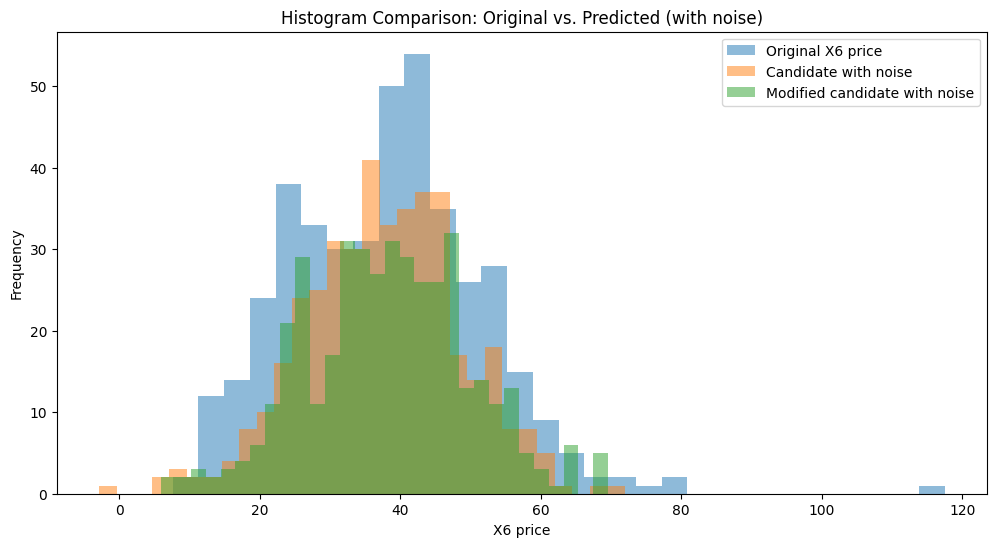

In [25]:
# ## Step 9: Plot Histograms for Comparison
#
# We compare the distributions of the original "X6 price" values and the predicted values (with noise) using histograms.

# %% [code]
plt.figure(figsize=(12, 6))
plt.hist(y, bins=30, alpha=0.5, label="Original X6 price")
plt.hist(y_pred_with_noise, bins=30, alpha=0.5, label="Candidate with noise")
plt.hist(y_pred_modified_with_noise, bins=30, alpha=0.5, label="Modified candidate with noise")
plt.xlabel("X6 price")
plt.ylabel("Frequency")
plt.title("Histogram Comparison: Original vs. Predicted (with noise)")
plt.legend()
plt.show()